# Indexing

In [2]:
%matplotlib inline
%config InlineBackend.close_figures = False

from pathlib import Path

import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from ficus import FigureManager

sns.set()
sns.set_palette("tab10")

In [66]:
all_resources = []

lca_sizes = dict(l.split() for l in Path("lca_sizes").read_text().split('\n') if l)
sbt_sizes = dict(l.split() for l in Path("sbt_sizes").read_text().split('\n') if l)

for domain in ('archaea', 'bacteria', 'fungi', 'protozoa', 'viral'):
    for index in ("lca", "sbt"):
        for k in (21, 31, 51):
            for source in ("genbank", "refseq"):
                if index == 'sbt':
                    for bf in [4]: #(5, 6):
                        try:
                            d = pd.read_table(f"farm_bench/sbt/{source}-{domain}-x1e{bf}-k{k}.txt")
                            d['bf'] = bf
                            d['size_MB'] = int(sbt_sizes[f'outputs/sbt/{source}-{domain}-x1e{bf}-k{k}.sbt.zip']) / 1024
                        except FileNotFoundError as e:
                            print(f"file not found: {e}")
                else:
                    d = pd.read_table(f"farm_bench/lca/{source}-{domain}-k{k}.txt")
                    d['bf'] = np.nan
                    d['size_MB'] = int(lca_sizes[f'outputs/lca/{source}-{domain}-k{k}-scaled10k.lca.json.gz']) / 1024

                d['domain'] = domain
                d['index'] = index
                d['source'] = source
                d['k'] = k
                all_resources.append(d)

In [67]:
full = pd.concat(all_resources, ignore_index=True)

In [68]:
full.query('domain=="protozoa"')

,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,bf,size_MB,domain,index,source,k
36,230.5689,0:03:50,3.26,11.45,0.03,0.59,0.0,0.00,0.00,NaN,16.961914,protozoa,lca,genbank,21
37,39.7093,0:00:39,1.82,19.61,0.38,0.82,0.0,0.00,0.00,NaN,2.043945,protozoa,lca,refseq,21
38,206.2120,0:03:26,3.32,11.45,0.14,0.57,0.0,0.00,0.00,NaN,18.800781,protozoa,lca,genbank,31
39,15.8309,0:00:15,166.79,186.30,158.69,161.64,0.0,1.00,94.29,NaN,2.191406,protozoa,lca,refseq,31
40,233.3709,0:03:53,3.52,11.45,0.39,0.80,0.0,0.00,0.00,NaN,20.469727,protozoa,lca,genbank,51
41,18.6991,0:00:18,6.15,21.89,1.16,2.71,0.0,0.00,0.00,NaN,2.305664,protozoa,lca,refseq,51
42,205.9419,0:03:25,753.08,780.25,744.33,745.78,0.0,169.25,94.71,4.0,302.170898,protozoa,sbt,genbank,21
43,16.6860,0:00:16,79.09,107.03,70.29,71.73,0.0,19.50,95.24,4.0,21.116211,protozoa,sbt,refseq,21
44,218.2314,0:03:38,770.37,797.81,761.66,763.10,0.0,8.97,89.13,4.0,315.385742,protozoa,sbt,genbank,31
45,19.1862,0:00:19,80.91,109.48,72.16,73.57,0.0,0.00,83.38,4.0,21.967773,protozoa,sbt,refseq,31


In [69]:
print(full.query('source=="genbank" & k==21 & index=="lca"')
     .set_index(["domain"])[['s', 'max_rss', 'size_MB']]
     .sort_values(by="size_MB")      
     .applymap(lambda x: "{:,.0f}".format(x)).to_markdown())

| domain   | s      |   max_rss |   size_MB |
|:---------|:-------|----------:|----------:|
| viral    | 57     |        33 |         2 |
| archaea  | 58     |        30 |         5 |
| protozoa | 231    |         3 |        17 |
| fungi    | 999    |         3 |        65 |
| bacteria | 12,717 |       857 |       446 |


In [70]:
print(full.query('source=="genbank" & k==21 & index=="sbt"')
     .set_index(["domain"])[['s', 'max_rss', 'size_MB']]
     .sort_values(by="size_MB")
     .applymap(lambda x: "{:,.0f}".format(x)).to_markdown())

| domain   | s      | max_rss   | size_MB   |
|:---------|:-------|:----------|:----------|
| viral    | 126    | 326       | 77        |
| archaea  | 111    | 217       | 100       |
| protozoa | 206    | 753       | 302       |
| fungi    | 1,161  | 3,364     | 1,585     |
| bacteria | 32,576 | 47,445    | 24,639    |


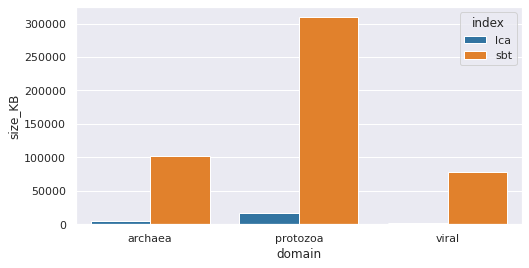

In [19]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    #sns.boxenplot(data=full[full['source']=='genbank'], y='s', x='domain', hue='index', ax=ax)
    sns.barplot(data=full.query("source == 'genbank' & k == 21 & domain != 'bacteria' & domain != 'fungi'"), y='size_KB', x='domain', hue='index', ax=ax)
    #ax.set_yscale('log')

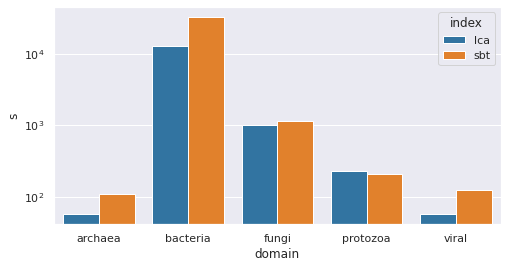

In [6]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    #sns.boxenplot(data=full[full['source']=='genbank'], y='s', x='domain', hue='index', ax=ax)
    sns.barplot(data=full.query("source == 'genbank' & k == 21"), y='s', x='domain', hue='index', ax=ax)
    ax.set_yscale('log')

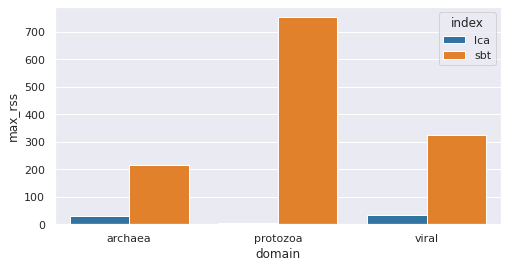

In [12]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    #sns.boxenplot(data=full[full['source']=='genbank'], y='s', x='domain', hue='index', ax=ax)
    sns.barplot(data=full.query("source == 'genbank' & k == 21 & domain != 'bacteria' & domain != 'fungi'"), y='max_rss', x='domain', hue='index', ax=ax)
    #ax.set_yscale('log')

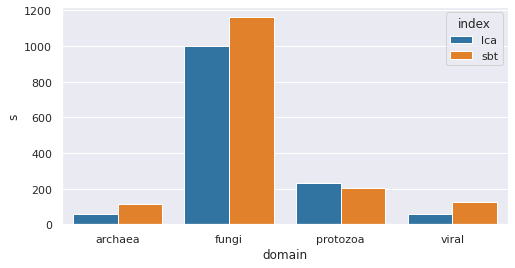

In [9]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    #sns.boxenplot(data=full[full['source']=='genbank'], y='s', x='domain', hue='index', ax=ax)
    sns.barplot(data=full.query("source == 'genbank' & k == 21 & domain != 'bacteria'"), y='s', x='domain', hue='index', ax=ax)
    #ax.set_yscale('log')

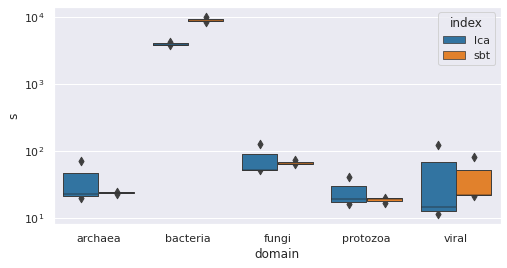

In [77]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    sns.boxenplot(data=full[full['source']=='refseq'], y='s', x='domain', hue='index', ax=ax)
    ax.set_yscale('log')

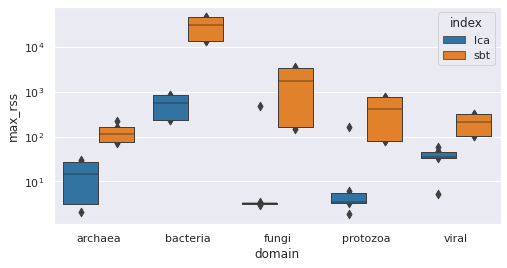

In [80]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    sns.boxenplot(data=full, y='max_rss', x='domain', hue='index', ax=ax)
    ax.set_yscale('log')

# Searching

In [134]:
all_resources = {}

for domain in ('archaea', 'bacteria', 'fungi', 'protozoa', 'viral'):
    for index in ("lca", "sbt"):
        fp = Path(f"timings/{domain}_{index}.txt").read_text()
        d = dict(l.strip().split(":")[:2] for l in fp.split('\n') if l)
        new_d = {}

        new_d['runtime_s'] = float(d['User time (seconds)']) + float(d['System time (seconds)'])
        new_d['mem_kb'] = int(d['Maximum resident set size (kbytes)'])
        new_d['index'] = index
        new_d['domain'] = domain
        
        for k in new_d:
            if k in all_resources:
                all_resources[k] += [new_d[k]]
            else:
                all_resources[k] = [new_d[k]]

df = pd.DataFrame(all_resources)

In [135]:
df

,runtime_s,mem_kb,index,domain
0,1.42,240088,lca,archaea
1,3.77,125280,sbt,archaea
2,231.26,20925984,lca,bacteria
3,3185.88,25589904,sbt,bacteria
4,26.92,3274388,lca,fungi
5,244.77,1655788,sbt,fungi
6,5.40,797816,lca,protozoa
7,43.51,332080,sbt,protozoa
8,1.06,223484,lca,viral
9,1.32,162628,sbt,viral


In [136]:
print(df.query('index=="lca"')
     .set_index(["domain"])[['runtime_s', 'mem_kb']]
     .sort_values(by="runtime_s").T
     .applymap(lambda x: "{:,.2f}".format(x)).to_markdown())
print()
print(df.query('index=="sbt"')
     .set_index(["domain"])[['runtime_s', 'mem_kb']]
     .sort_values(by="runtime_s").T
     .applymap(lambda x: "{:,.2f}".format(x)).to_markdown())

|           | viral      | archaea    | protozoa   | fungi        | bacteria      |
|:----------|:-----------|:-----------|:-----------|:-------------|:--------------|
| runtime_s | 1.06       | 1.42       | 5.40       | 26.92        | 231.26        |
| mem_kb    | 223,484.00 | 240,088.00 | 797,816.00 | 3,274,388.00 | 20,925,984.00 |

|           | viral      | archaea    | protozoa   | fungi        | bacteria      |
|:----------|:-----------|:-----------|:-----------|:-------------|:--------------|
| runtime_s | 1.32       | 3.77       | 43.51      | 244.77       | 3,185.88      |
| mem_kb    | 162,628.00 | 125,280.00 | 332,080.00 | 1,655,788.00 | 25,589,904.00 |


In [ ]:
print(df.query('index=="lca"  & domain != "bacteria"')
     .set_index(["domain"])[['runtime_s', 'mem_kb']]
     .sort_values(by="runtime_s")
     .applymap(lambda x: "{:,.2f}".format(x)).to_markdown())
print()
print(df.query('index=="sbt" & domain != "bacteria"')
     .set_index(["domain"])[['runtime_s', 'mem_kb']]
     .sort_values(by="runtime_s")
     .applymap(lambda x: "{:,.2f}".format(x)).to_markdown())

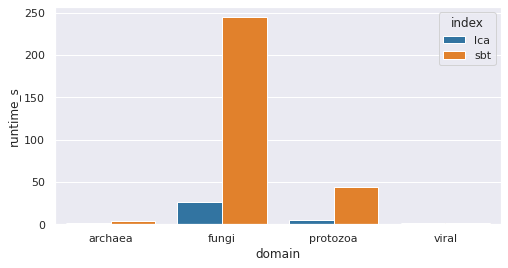

In [115]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    sns.barplot(data=df.query('domain != "bacteria"'), y='runtime_s', x='domain', hue='index', ax=ax)
    #ax.set_yscale('log')

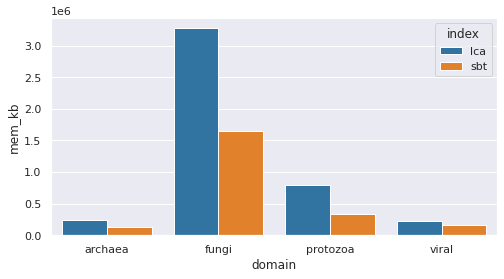

In [114]:
with FigureManager(figsize=(8, 4), show=True) as (fig, ax):
    sns.barplot(data=df.query('domain != "bacteria"'), y='mem_kb', x='domain', hue='index', ax=ax)
    #ax.set_yscale('log')